In [1]:
#Importamos las carpetas que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('pinacate.txt', skiprows=4, sep='\s+')

In [3]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,29/01/2019,18:00,168.0,290.0,1.25,11.9,21.2,23.0,997.6,0.0,653.3,31.9,29.0,9.0,16.5
1,29/01/2019,19:00,141.0,160.0,2.22,9.4,23.1,20.0,996.7,0.0,443.0,32.5,18.0,9.0,16.6
2,29/01/2019,20:00,169.0,164.0,6.67,16.2,24.6,18.0,995.7,0.0,638.3,37.2,16.0,9.0,16.8
3,29/01/2019,21:00,193.0,213.0,10.13,18.0,24.3,19.0,995.1,0.0,369.8,32.3,10.0,9.0,17.1
4,29/01/2019,22:00,203.0,178.0,8.08,17.3,24.7,18.0,994.5,0.0,420.8,33.3,12.0,9.0,17.4


In [4]:
df = pd.DataFrame(df0)

In [5]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB       float64
HUMSUBS       float64
TEMPSUBS      float64
dtype: object

In [6]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,168.0,290.0,1.25,11.9,21.2,23.0,997.6,0.0,653.3,31.9,29.0,9.0,16.5,2019-01-29 18:00:00
1,141.0,160.0,2.22,9.4,23.1,20.0,996.7,0.0,443.0,32.5,18.0,9.0,16.6,2019-01-29 19:00:00
2,169.0,164.0,6.67,16.2,24.6,18.0,995.7,0.0,638.3,37.2,16.0,9.0,16.8,2019-01-29 20:00:00
3,193.0,213.0,10.13,18.0,24.3,19.0,995.1,0.0,369.8,32.3,10.0,9.0,17.1,2019-01-29 21:00:00
4,203.0,178.0,8.08,17.3,24.7,18.0,994.5,0.0,420.8,33.3,12.0,9.0,17.4,2019-01-29 22:00:00


In [8]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000
mean,173.492063,191.31746,7.492540,14.896825,15.955556,41.396825,996.325397,0.0,169.476190,16.796825,37.206349,8.857143,17.479365
std,102.511191,99.06349,4.806557,7.387434,5.876162,14.980137,1.396767,0.0,230.158742,11.053987,18.019845,0.352738,0.774421
min,4.000000,6.00000,0.390000,5.400000,6.200000,18.000000,994.000000,0.0,0.000000,2.200000,10.000000,8.000000,16.200000
25%,100.000000,136.00000,3.970000,9.550000,10.650000,28.500000,995.100000,0.0,0.000000,7.550000,22.000000,9.000000,16.800000
50%,163.000000,177.00000,6.670000,11.900000,15.200000,43.000000,996.500000,0.0,2.200000,13.100000,34.000000,9.000000,17.500000
75%,203.000000,285.50000,9.755000,18.200000,21.650000,55.500000,997.200000,0.0,325.800000,27.250000,53.000000,9.000000,18.050000
max,351.000000,359.00000,20.650000,33.500000,24.700000,65.000000,999.700000,0.0,656.200000,37.200000,71.000000,9.000000,18.800000


In [9]:
df_tmp = df[df.TEMP > 23] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
1,141.0,160.0,2.22,9.4,23.1,20.0,996.7,0.0,443.0,32.5,18.0,9.0,16.6,2019-01-29 19:00:00
2,169.0,164.0,6.67,16.2,24.6,18.0,995.7,0.0,638.3,37.2,16.0,9.0,16.8,2019-01-29 20:00:00
3,193.0,213.0,10.13,18.0,24.3,19.0,995.1,0.0,369.8,32.3,10.0,9.0,17.1,2019-01-29 21:00:00
4,203.0,178.0,8.08,17.3,24.7,18.0,994.5,0.0,420.8,33.3,12.0,9.0,17.4,2019-01-29 22:00:00
5,204.0,214.0,11.78,18.7,23.6,22.0,994.3,0.0,210.5,28.6,12.0,9.0,17.8,2019-01-29 23:00:00
25,192.0,177.0,13.00,28.8,23.2,23.0,996.5,0.0,590.7,33.2,23.0,9.0,16.7,2019-01-30 19:00:00
26,184.0,180.0,12.83,24.5,24.0,22.0,995.7,0.0,633.5,35.0,19.0,9.0,16.9,2019-01-30 20:00:00
27,198.0,190.0,12.62,23.4,24.0,20.0,995.3,0.0,521.0,34.0,15.0,9.0,17.3,2019-01-30 21:00:00
28,187.0,174.0,9.86,22.0,24.3,19.0,994.9,0.0,475.0,35.1,14.0,9.0,17.7,2019-01-30 22:00:00
29,174.0,177.0,9.39,18.7,24.5,20.0,994.6,0.0,324.8,33.0,12.0,9.0,18.0,2019-01-30 23:00:00


In [10]:
df.mean()

DIRS        173.492063
DIRR        191.317460
VELS          7.492540
VELR         14.896825
TEMP         15.955556
HR           41.396825
PB          996.325397
PREC          0.000000
RADSOL      169.476190
TEMPCOMB     16.796825
HUMCOMB      37.206349
HUMSUBS       8.857143
TEMPSUBS     17.479365
dtype: float64

In [11]:
df.TEMP.mean()

15.955555555555552

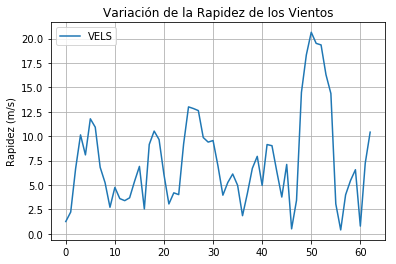

In [12]:
#Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

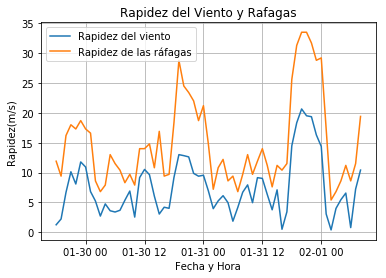

In [13]:
df3 = df[['VELS','VELR']]
plt.plot(df.FECHA,df3); plt.legend(["Rapidez del viento","Rapidez de las ráfagas"])
plt.title("Rapidez del Viento y Rafagas")
plt.xlabel("Fecha y Hora")
plt.ylabel("Rapidez(m/s)")
plt.grid(True)
plt.show()

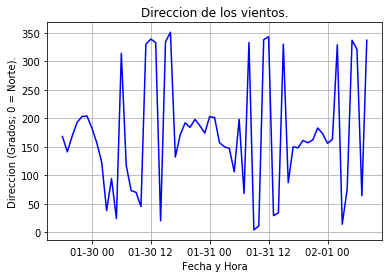

In [14]:
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Direccion de los vientos.")
plt.xlabel("Fecha y Hora")
plt.ylabel("Direccion (Grados; 0 = Norte).")
plt.grid(True)
plt.show()

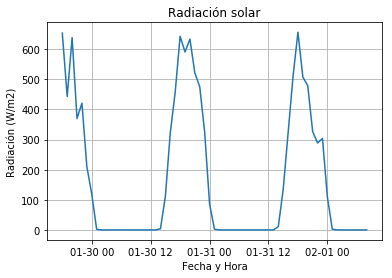

In [15]:
plt.plot(df.FECHA,df['RADSOL'])
plt.title("Radiación solar")
plt.xlabel("Fecha y Hora")
plt.ylabel("Radiación (W/m2)")
plt.grid(True)
plt.show()

In [16]:
#Lapso de la temperatura
df.TEMP.max() - df.TEMP.min()

18.5

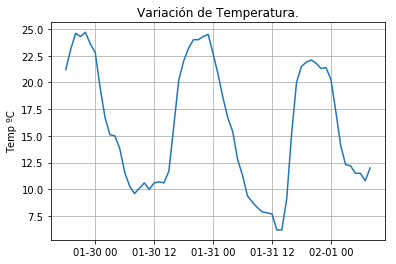

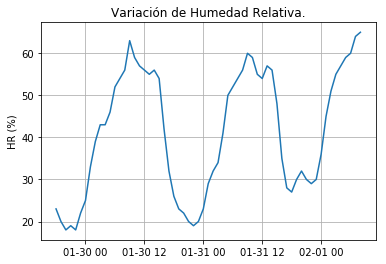

In [17]:
#Gráficas de Temperatura y Humedad Relativa 
plt.plot(df.FECHA,df.TEMP)
plt.title("Variación de Temperatura.")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()
plt.plot(df.FECHA,df.HR)
plt.title("Variación de Humedad Relativa.")
plt.ylabel("HR (%)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

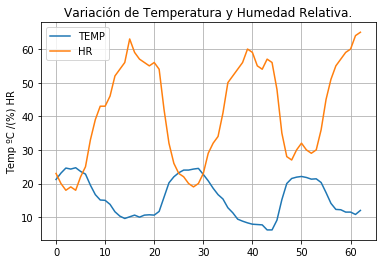

In [18]:
#Gráfica de Temperatura y Humedad Relativa# Gráfic 
df4 = df[['TEMP','HR']]
plt.figure(); df4.plot(); plt.legend(loc='best')
plt.title("Variación de Temperatura y Humedad Relativa.")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

In [19]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000
mean,173.492063,191.31746,7.492540,14.896825,15.955556,41.396825,996.325397,0.0,169.476190,16.796825,37.206349,8.857143,17.479365
std,102.511191,99.06349,4.806557,7.387434,5.876162,14.980137,1.396767,0.0,230.158742,11.053987,18.019845,0.352738,0.774421
min,4.000000,6.00000,0.390000,5.400000,6.200000,18.000000,994.000000,0.0,0.000000,2.200000,10.000000,8.000000,16.200000
25%,100.000000,136.00000,3.970000,9.550000,10.650000,28.500000,995.100000,0.0,0.000000,7.550000,22.000000,9.000000,16.800000
50%,163.000000,177.00000,6.670000,11.900000,15.200000,43.000000,996.500000,0.0,2.200000,13.100000,34.000000,9.000000,17.500000
75%,203.000000,285.50000,9.755000,18.200000,21.650000,55.500000,997.200000,0.0,325.800000,27.250000,53.000000,9.000000,18.050000
max,351.000000,359.00000,20.650000,33.500000,24.700000,65.000000,999.700000,0.0,656.200000,37.200000,71.000000,9.000000,18.800000


In [ ]:
c